In [1]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [2]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/boehm'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    # print(result.stdout)
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

t = pd.read_csv('../../andrade/sample_data/data.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [3]:
df = runDbscan(t, 100, 0.4)

In [6]:
clusters = df[df['state']=='[noise or border]'].groupby('cluster_id')

[]

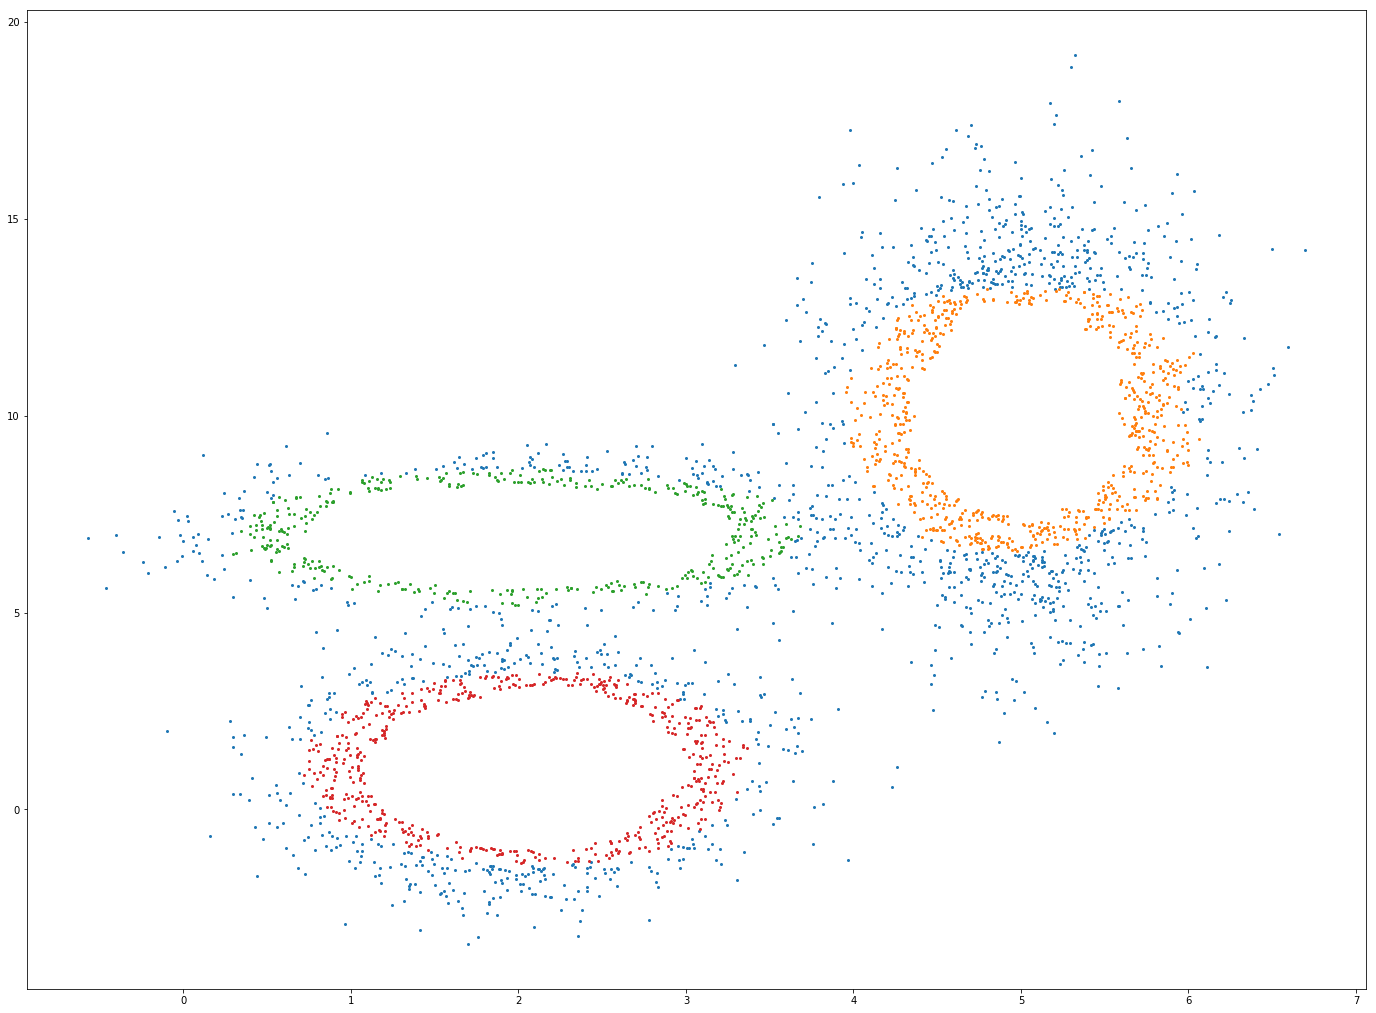

In [7]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
plt.plot()

In [8]:
set(df['cluster_id'])

{0, 1, 7, 12}

In [9]:
df[df['state']=='[reserved]']

,cluster_id,state,x,y


In [10]:
df[df['cluster_id']>9000]

,cluster_id,state,x,y


In [11]:
df.iloc[9969]

cluster_id          7
state          [core]
x             1.21111
y             6.60234
Name: 9969, dtype: object